## Assignment 2: $k$ Nearest Neighbor

### Do any four.

Pavi Gupta, tgz5gw

**Q1.** Please answer the following questions.
1. What is the difference between regression and classification?
2. What is a confusion table/matrix? What does it help us understand about a model's performance? 
3. What is Accuracy? Why might it not be entirely sufficient to evaluate a classifer's predictive performance?
4. What does the root mean squared error quantify about a particular model?
5. What are overfitting and underfitting? 
6. Why does splitting the data into training and testing sets, and choosing $k$ by evaluating accuracy or RMSE on the test set, improve model performance?
7. With classification, we can report a class label as a prediction or a probability distribution over class labels. Please explain the strengths and weaknesses of each approach.

1. The difference between regression and classification is regression predicts continuous and numerical values, such as GPA or temperature. Meanwhile, classification predicts dicrete and categorical labels, such as yes or no. Ultimately, when data is inputted, the output types differ for both.
2. A confusion table/matrix is a way of measuring the performance of a classification model. The table uses true positives/negatives and false positives/negatives to help us see where the model needs more work. It helps summaries the prediction results of data by comparing the training data with new test data and seeing if it peforms accurately, which helps us understand how well the model is performing. 
3. Accuracy is a way of measuring how well the model can make predictions. We can find the accuracy of a model by dividing the number of correct predictions made by the total number of predictions we asked it to make. However, accuracy may not be entirely sufficient to evaluate a classifier's predictive performance because it treats all errors equally and is not able to handle imbalanced datasets. It does not account for false positives/negatives and can lead to misleading interpretations.
4. The root mean sqaured error of a particular model quantifies the average magnitude of preduction errors in a regression model by calculating the sqaure root of the average squared differences between observed and predicted values. 
5. Overfitting is when the model captures a lot of the noise and outlier points instead of focusing on the underlying structure in an attempt to be too accurate, and ultimately leading to lower predictive power. Overfit lines are often super curvy and try to hit as many points that are spread out as possible. Underfitting is when the model is to simple to understand what the underlying structure of the data is. This makes the model perform poorly and unable to properly interpret new data as well. Underfit lines are usually straight and linear. 
6. This improves model performance because it prevents overfitting. This is important because it makes sure that when new data is introduced, it generalizes it. Having k allows the model to achieve a balance between bias and variance. This optimizes the model and improves its performance.
7. Stregnths of class label prediction are that they tend to be more accurate and provide clear and direct answers. Some weaknesses are that they do not share how confident the model is and ignores costs of errors that vary from the default threshold. Strengths of probability distribution are that they give a confidence estimation of the model and have custom thresholds for optimal decision making. Some weaknesses are that it is pretty hard to use and can easily provide wrong predictions if the model if overfit. 

**Q2.** This is a case study on $k$ nearest neighbor classification, using the `land_mines.csv` data.

The data consists of a label, `mine_type`, taking integer values 1 to 5, and three properties of the mine, `voltage`, `height` and `soil`. We want to predict the kind of mine from data about it. Imagine working for the DOD or a humanitarian aid agency, trying to help people remove land mines more safely.

1. Load the data. Perform some EDA, summarizing the target label and the relationships between the features (e.g. scatterplots, describe tables).
2. Split the sample 50/50 into training and test/validation sets. (The smaller the data are, the more equal the split should be, in my experience: Otherwise, all of the members of one class end up in the training or test data, and the model falls apart.)
3. Build a $k$-NN classifier. Explain how you select $k$.
4. Print a confusion table for your best model, comparing predicted and actual class label on the test set. How accurate is it? Where is performance more or less accurate?
5. Notice that you can have a lot of accurate predictions for a given type of mine, but still make a lot of mistakes. Please explain how you'd advise someone to actually use this predictive model in practice, given the errors that it tends to make.

          voltage      height        soil   mine_type
count  338.000000  338.000000  338.000000  338.000000
mean     0.430634    0.508876    0.503550    2.952663
std      0.195819    0.306043    0.344244    1.419703
min      0.197734    0.000000    0.000000    1.000000
25%      0.309737    0.272727    0.200000    2.000000
50%      0.359516    0.545455    0.600000    3.000000
75%      0.482628    0.727273    0.800000    4.000000
max      0.999999    1.000000    1.000000    5.000000


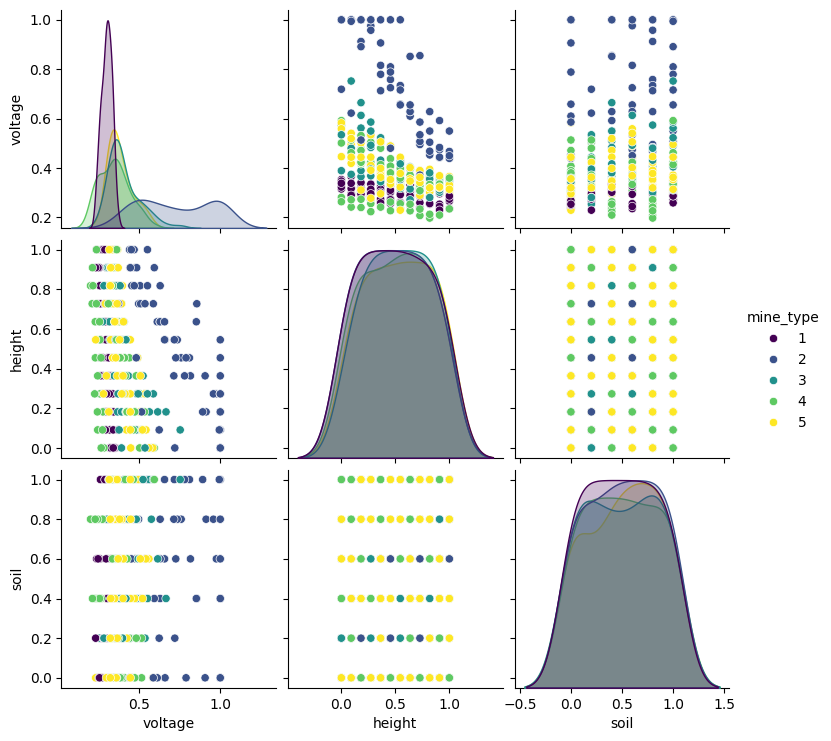

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

# Question 1
df = pd.read_csv('data/land_mines.csv')

print(df.describe())
sns.pairplot(df, hue='mine_type', palette='viridis')
plt.show()

In [25]:
# Question 2
X = df.drop('mine_type', axis=1)
y = df['mine_type']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.5, random_state=42, stratify=y
)

In [26]:
# Question 3
ks = range(1, 21)
accuracies = []
for k in ks:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    accuracies.append(knn.score(X_test, y_test))

best_k = ks[np.argmax(accuracies)]
print(f"Optimal k: {best_k}")

Optimal k: 1


How is k selected? In order to find the optimal k, it is ran through a loop and and the accuracy is measured at each value in the test set. The code found that when k=1, it achieved its highest accuracy.

In [27]:
# Question 4
best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_train, y_train)
y_pred = best_knn.predict(X_test)

print("\n--- Confusion Matrix ---")
print(pd.DataFrame(confusion_matrix(y_test, y_pred), 
                   index=[f"Actual {i}" for i in range(1,6)], 
                   columns=[f"Pred {i}" for i in range(1,6)]))

print("\n--- Performance Metrics ---")
print(classification_report(y_test, y_pred))


--- Confusion Matrix ---
          Pred 1  Pred 2  Pred 3  Pred 4  Pred 5
Actual 1      21       0       3       4       8
Actual 2       0      32       0       3       0
Actual 3       7       0       9      10       7
Actual 4       6       5       4      13       5
Actual 5       6       0      10       8       8

--- Performance Metrics ---
              precision    recall  f1-score   support

           1       0.53      0.58      0.55        36
           2       0.86      0.91      0.89        35
           3       0.35      0.27      0.31        33
           4       0.34      0.39      0.37        33
           5       0.29      0.25      0.27        32

    accuracy                           0.49       169
   macro avg       0.47      0.48      0.48       169
weighted avg       0.48      0.49      0.48       169



The overall accuracy of this model is about 49%. Performance is more accurate at Type 2 and less at Types 3, 4, and 5. This means that the model will more accurate identify a Type 2 mine than any other type.

### Question 5
In order for someone to actually be able to use the predictive model while knowing that it makes a lot of errors, I would tell them to treat the clusters with lower precision with a lot more caution and try not to rely too heavily on the results it produces. If anything, it should serve as a second opinion after a human has already decided the solution. In this situation, Types 3, 4, and 5 have the lowest accuracies of less than 50%. Even Type 1 isn't that great to rely on because it's barely over 50%. In cases like these, the model should get more training data and not be fully trusted without any sort of verification. 

**Q3.** This question is a case study for $k$ nearest neighbor regression, using the `USA_cars_datasets.csv` data.

The target variable `y` is `price` and the features are `year` and `mileage`.

1. Load the `./data/USA_cars_datasets.csv`. Keep the following variables and drop the rest: `price`, `year`, `mileage`. Are there any `NA`'s to handle? Look at the head and dimensions of the data.
2. Maxmin normalize `year` and `mileage`.
3. Split the sample into ~80% for training and ~20% for hyper-parameter selection and evaluation.
4. Use the $k$-NN algorithm and the training data to predict `price` using `year` and `mileage` for the test set for $k=3,10,25,50,100,300$. For each value of $k$, compute the mean squared error and print a scatterplot showing the test value plotted against the predicted value. What patterns do you notice as you increase $k$?
5. Determine the optimal $k$ for these data.
6. Describe what happened in the plots of predicted versus actual prices as $k$ varied, taking your answer into part 6 into account. (Hint: Use the words "underfitting" and "overfitting".)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Question 1

df = pd.read_csv('data/USA_cars_datasets.csv')
df = df[['price', 'year', 'mileage']]

print("Number of missing values: ")
print(df.isna().sum())

# Data inspection
print("\nFirst 5 rows:")
print(df.head())
print("\nData dimensions:", df.shape)

Number of missing values: 
price      0
year       0
mileage    0
dtype: int64

First 5 rows:
   price  year  mileage
0   6300  2008   274117
1   2899  2011   190552
2   5350  2018    39590
3  25000  2014    64146
4  27700  2018     6654

Data dimensions: (2499, 3)


In [5]:
# Question 2
def min_max_scale(series):
    return (series - series.min()) / (series.max() - series.min())

df['year'] = min_max_scale(df['year'])
df['mileage'] = min_max_scale(df['mileage'])

In [6]:
# Question 3
df_shuffled = df.sample(frac=1, random_state=123).reset_index(drop=True)
split_idx = int(0.8 * len(df_shuffled))

train_df = df_shuffled.iloc[:split_idx]
test_df = df_shuffled.iloc[split_idx:]

X_train = train_df[['year', 'mileage']].values
y_train = train_df['price'].values
X_test = test_df[['year', 'mileage']].values
y_test = test_df['price'].values

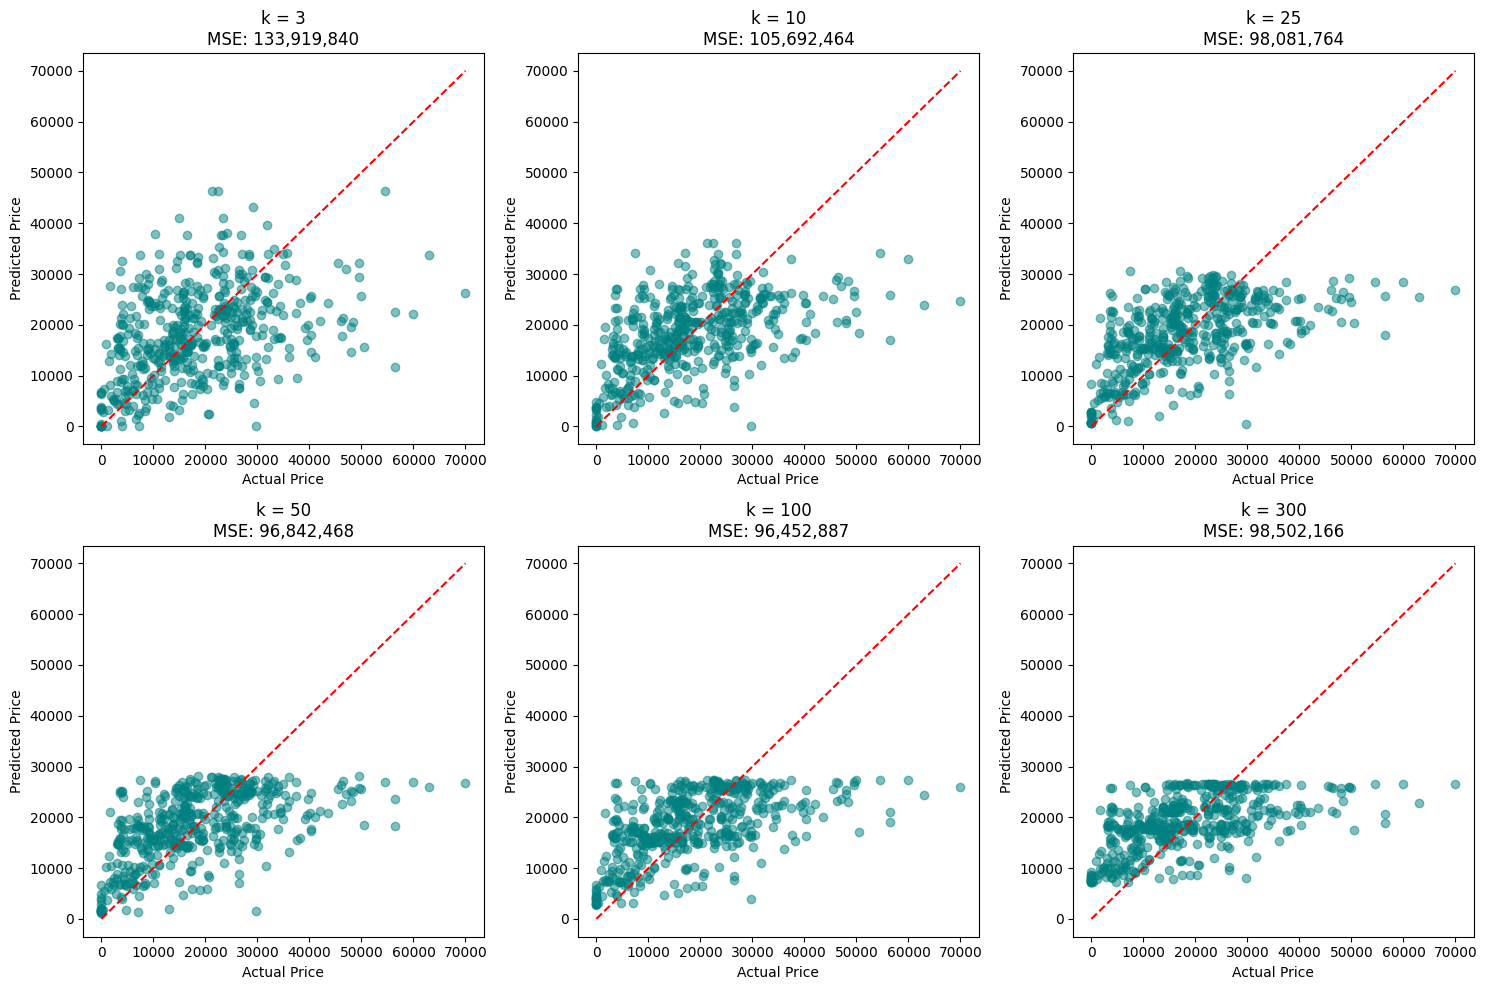


MSE results for each k (Manual):
k =   3: MSE =  133,919,840.43
k =  10: MSE =  105,692,464.02
k =  25: MSE =   98,081,764.28
k =  50: MSE =   96,842,467.57
k = 100: MSE =   96,452,887.34
k = 300: MSE =   98,502,166.48


In [7]:
# Question 4
def knn_predict(X_train, y_train, X_test, k):
    predictions = []
    for x_query in X_test:
        # Calculate Euclidean distance
        distances = np.sqrt(np.sum((X_train - x_query)**2, axis=1))
        
        # Get indices of k smallest distances
        k_indices = np.argsort(distances)[:k]
        
        # Predict the average price of those k neighbors
        predictions.append(np.mean(y_train[k_indices]))
    return np.array(predictions)

ks = [3, 10, 25, 50, 100, 300]
mse_results = {}

plt.figure(figsize=(15, 10))
for i, k in enumerate(ks):
    # Get predictions using the manual function
    y_pred = knn_predict(X_train, y_train, X_test, k)
    
    # Manual MSE calculation: mean of squared differences
    mse = np.mean((y_test - y_pred)**2)
    mse_results[k] = mse
    
    plt.subplot(2, 3, i+1)
    plt.scatter(y_test, y_pred, alpha=0.5, color='teal')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.title(f'k = {k}\nMSE: {mse:,.0f}')
    plt.xlabel('Actual Price')
    plt.ylabel('Predicted Price')

plt.tight_layout()
plt.show()

print("\nMSE results for each k (Manual):")
for k, mse in mse_results.items():
    print(f"k = {k:3}: MSE = {mse:15,.2f}")

Patterns noticed: I noticed that as k increases, the points get closer and closer horizontally. This means that the mean standard error decreases.

In [8]:
# Question 5
optimal_k = min(mse_results, key=mse_results.get)
print(f"\nOptimal k: {optimal_k}")


Optimal k: 100


### Question 6

When k is low (k=3), the model is being overfit, which means that is it very sensitive to the noise/outliers in the training data. We can see that there is a lot of variance in that plot. 
When k is high (k=300), the model is being underfit, which means that the model is too simple and can't really do much. We can see that as the model underfits, it looks more like a blob. 
When k reaches its best fit (k=50), the model is at about average and at the best we can get it to give us accurate predictions without being affected too much by the noise.

**Q6.** This is a case study using $k$ nearest neighbor regression for imputation, using the `airbnb_hw.csv` data.

There are 30,478 observations, but only 22,155 ratings. We're going to build a kNN regressor to impute missing values. This is a common task, and illustrates one way you can use kNN in the future even when you have more advanced models available.

1. Load the `airbnb_hw.csv` data with Pandas. We're only going to use `Review Scores Rating`, `Price`, and `Beds`, so use `.loc` to column filter the dataframe to those variables.
2. Set use `.isnull()` and `.loc` to select the subset of the dataframe with missing review values. Set those aside in a different dataframe. We'll make predictions about them later.
3. Use `df = df.dropna(axis = 0, how = 'any')` to eliminate any observations with missing values/NA's from the dataframe.
4. For the complete cases, create a $k$-NN model that uses the variables `Price` and `Beds` to predict `Review Scores Rating`. How do you choose $k$? (Hint: Train/test split, iterate over reasonable values of $k$ and find a value that minimizes SSE on the test split using predictions from the training set.)
5. Predict the missing ratings. 
6. Do a kernel density plot of the training ratings and the predicted missing ratings. Do they look similar or not? Describe what you see.

In [15]:
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler

# Question 1
df = pd.read_csv('data/airbnb_hw.csv')
df = df.loc[:, ['Review Scores Rating', 'Price', 'Beds']]

if df['Price'].dtype == 'O':
    df['Price'] = df['Price'].str.replace('$', '', regex=False).str.replace(',', '', regex=False).astype(float)

df.head()

,Review Scores Rating,Price,Beds
0,NaN,145.0,1.0
1,NaN,37.0,1.0
2,NaN,28.0,1.0
3,NaN,199.0,3.0
4,96.0,549.0,3.0


In [16]:
# Question 2
df_missing = df.loc[df['Review Scores Rating'].isnull()].copy()
df_missing.head()

,Review Scores Rating,Price,Beds
0,NaN,145.0,1.0
1,NaN,37.0,1.0
2,NaN,28.0,1.0
3,NaN,199.0,3.0
13,NaN,68.0,1.0


In [17]:
# Question 3
df_complete = df.dropna(axis=0, how='any').copy()
df_complete.head()

,Review Scores Rating,Price,Beds
4,96.0,549.0,3.0
5,100.0,149.0,1.0
6,100.0,250.0,1.0
7,94.0,90.0,1.0
8,90.0,270.0,2.0


In [19]:
df_missing = df_missing.dropna(subset=['Price', 'Beds'])

In [20]:
# Question 4
X = df_complete[['Price', 'Beds']]
y = df_complete['Review Scores Rating']

# Scaling is crucial for k-NN because Price and Beds have different units
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split complete cases into Training (80%) and Test (20%)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Iterate over values of k to find the one that minimizes SSE
ks = range(1, 151)
sses = []
for k in ks:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    sse = np.sum((y_test - y_pred)**2)
    sses.append(sse)

optimal_k = ks[np.argmin(sses)]
print(f"The optimal k value is: {optimal_k}")

The optimal k value is: 109


How do you pick the optimal k? The optimal k was picked off of the k value out of a span of ks that had the lowest sum of squared errors (SSE).

In [21]:
# Question 5
knn_final = KNeighborsRegressor(n_neighbors=optimal_k)
knn_final.fit(X_scaled, y)

# Scale the predictors for the missing data
X_missing_scaled = scaler.transform(df_missing[['Price', 'Beds']])
df_missing['Predicted Rating'] = knn_final.predict(X_missing_scaled)

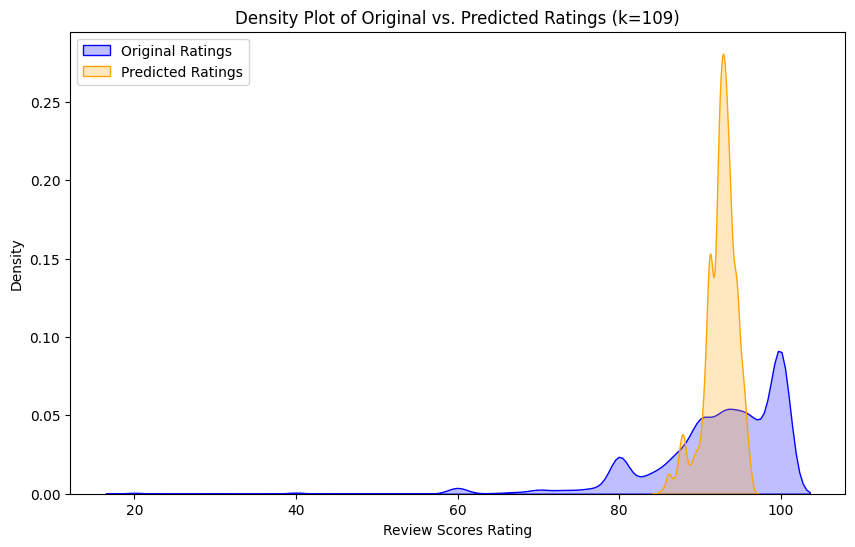

In [22]:
# Question 6
plt.figure(figsize=(10, 6))
sns.kdeplot(df_complete['Review Scores Rating'], label='Original Ratings', fill=True, color='blue')
sns.kdeplot(df_missing['Predicted Rating'], label='Predicted Ratings', fill=True, color='orange')
plt.title(f'Density Plot of Original vs. Predicted Ratings (k={optimal_k})')
plt.xlabel('Review Scores Rating')
plt.ylabel('Density')
plt.legend()
plt.show()

 Do a kernel density plot of the training ratings and the predicted missing ratings. Do they look similar or not? Describe what you see.
The graph above shows a comparison of the original ratings and the predicted missing ratings. Both plots don't exactly look similar. The original ratings have higher scores and densities. The predicted ratings have a higher density at about 90, while the original ratings are a lot more spread out. 